In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from importlib import reload
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from evaluation import *

In [2]:
df = load_data()

# Typical RFM model Analysis 

## 1. Categorical level RFM with Kmeans++
The section we transform the raw data amount from continuous variable into categorical variable with different levels. i.e. from 1 to 5. 5 presents the top 20% of data, 1 presents to the last 20%

Clusters = 2 ,Silhouette Score = 0.44877
Clusters = 3 ,Silhouette Score = 0.38505
Clusters = 4 ,Silhouette Score = 0.39822
Clusters = 5 ,Silhouette Score = 0.37642
Clusters = 6 ,Silhouette Score = 0.37518
Clusters = 7 ,Silhouette Score = 0.39081
Clusters = 8 ,Silhouette Score = 0.37539
Clusters = 9 ,Silhouette Score = 0.37931
Clusters = 10 ,Silhouette Score = 0.38034
Clusters = 11 ,Silhouette Score = 0.37254
Clusters = 12 ,Silhouette Score = 0.39779
Clusters = 13 ,Silhouette Score = 0.38274
Clusters = 14 ,Silhouette Score = 0.39681


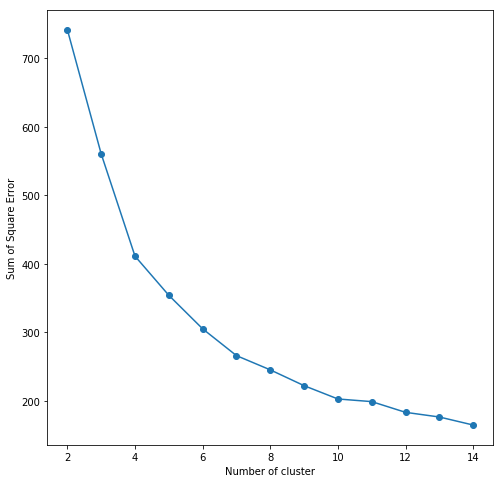

In [3]:
t_rfm = rfm(df)
t_rfm_trans = rfm_transform(t_rfm)
matrix_trans = rfm_matrix(t_rfm_trans)
sse, sscore, test_range = kmeans(matrix_trans)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [4]:
clusters_trans = kmeans(matrix = matrix_trans, cluster_num = 4)
temp = t_rfm.copy()
temp = rfm_write_back(temp,clusters_trans)
temp.groupby('Cluster',as_index = False)['CustomerID'].count()

,Cluster,CustomerID
0,0,1190
1,1,1283
2,2,895
3,3,954


## 2. Normalized continuous data RFM with Kmeans

Clusters = 2 ,Silhouette Score = 0.73375
Clusters = 3 ,Silhouette Score = 0.66627
Clusters = 4 ,Silhouette Score = 0.59971
Clusters = 5 ,Silhouette Score = 0.59711
Clusters = 6 ,Silhouette Score = 0.58136
Clusters = 7 ,Silhouette Score = 0.57991
Clusters = 8 ,Silhouette Score = 0.53318
Clusters = 9 ,Silhouette Score = 0.53049
Clusters = 10 ,Silhouette Score = 0.53169
Clusters = 11 ,Silhouette Score = 0.52271
Clusters = 12 ,Silhouette Score = 0.53046
Clusters = 13 ,Silhouette Score = 0.52272
Clusters = 14 ,Silhouette Score = 0.52001


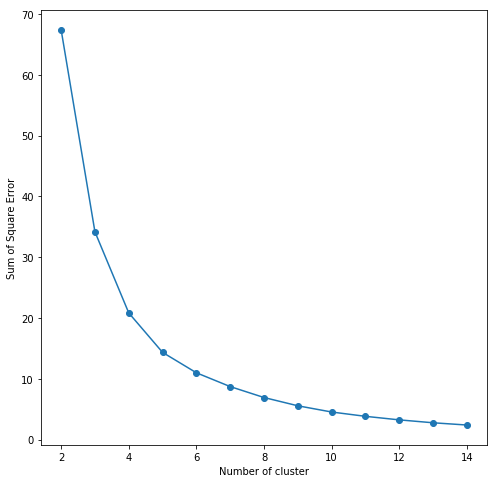

In [5]:
t_rfm_norm = norm(t_rfm.iloc[:,1:])
matrix_norm = rfm_matrix(t_rfm_norm)
sse, sscore, test_range = kmeans(matrix_norm)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [10]:
clusters_norm = kmeans(matrix = matrix_norm, cluster_num = 5)
temp = rfm_write_back(temp,clusters_norm)
temp.groupby('Cluster',as_index = False)['CustomerID'].count()

,Cluster,CustomerID
0,0,627
1,1,2577
2,2,293
3,3,515
4,4,310


## 3. Categorical level RFM with DBSCAN

In [7]:
from sklearn.cluster import DBSCAN
X_trans = t_rfm_trans.iloc[:,1:]
db = DBSCAN(eps= 0.2, min_samples=80).fit(X_trans)
labels_trans = db.labels_
n_clusters_trans = len(set(labels_trans)) - (1 if -1 in labels_trans else 0)
print(n_clusters_trans)
X_trans['DBcluster'] = labels_trans
X_trans.groupby("DBcluster", as_index = False).count()

13


,DBcluster,Frequency,Recency,Monetary
0,-1,2530,2530,2530
1,0,215,215,215
2,1,136,136,136
3,2,88,88,88
4,3,91,91,91
5,4,120,120,120
6,5,106,106,106
7,6,142,142,142
8,7,108,108,108
9,8,96,96,96


## 4. Normalized continuous data RFM with Kmeans

In [8]:
X_norm = norm(t_rfm.iloc[:,1:])
db = DBSCAN(eps=0.01, min_samples=25).fit(X_norm)
labels_norm = db.labels_
n_clusters_norm = len(set(labels_norm)) - (1 if -1 in labels_norm else 0)
print(n_clusters_norm)
X_norm['DBcluster'] = labels_norm
X_norm.groupby("DBcluster", as_index = False).count()

8


,DBcluster,Frequency,Recency,Monetary
0,-1,516,516,516
1,0,111,111,111
2,1,2577,2577,2577
3,2,310,310,310
4,3,418,418,418
5,4,97,97,97
6,5,248,248,248
7,6,30,30,30
8,7,15,15,15


## 5. Compute the score with results of the clusters above

In [11]:
result = get_score(matrix_trans,clusters_trans,'Categorical RFM trans Kmeans++')
result = get_score(matrix_norm,clusters_norm,'Norm RFM Kmeans++',result,flag=1)
matrix_trans = X_trans.values
result = get_score(matrix_trans,labels_trans,'Categorical RFM DBSCAN',result,flag=1)
matrix_norm = X_norm.values
result = get_score(matrix_norm,labels_norm,'Norm RFM DBSCAN',result,flag=1)
print(result)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_di

                            Model Silhouette Coefficient  \
0  Categorical RFM trans Kmeans++                0.17902   
1               Norm RFM Kmeans++                 0.8541   
2          Categorical RFM DBSCAN                  0.551   
3                 Norm RFM DBSCAN                0.91559   

  Calinski-Harabaz Index Davies-Bouldin Index  
0             1120.11082              1.44231  
1                27387.7              0.31676  
2                3037.53               0.3226  
3                95902.8              0.09334  
